<center><h1>Modelo para aprobar prestamos</h1></center>

## **Contenido:**

* **1 Descripción del Problema**
* **2 Descripción de los Datos**
* **3 Análisis Exploratorio y Descriptivo de los Datos**
* **4 Modelacón**
* **5 Evalación y Selección del Modelo**
* **6 Despliegue del Modelo en Producción**

<h1>Este proyecto trata de automatizar el proceso de elegibilidad para préstamos. La tarea consiste en predecir si el préstamo se aprobará o no en función de los detalles proporcionados por los clientes. </h1>

<div>
<img src="images/img1.PNG" width="900"/>
</div>

# Importacion de librerias
* ## Para leer, escribir y operar los datos
* ## Para visualizacion de los datos
* ## Para la creacion y evaluacion de los modelos

###  **Diccionario de variables**
* **Loan_ID = Identificacion de prestamo**
* **Gender = Genero**
* **Married = Casado**
* **Dependents = Dependientes**
* **Education = Educacion**
* **Self_Employed = trabajaor independiente**
* **ApplicantIncome = Ingresos**
* **CoapplicantIncome = Coaplicante ingresos**
* **LoanAmount = Monto del prestamo**
* **Loan_Amount_Term = Plazo del monto del prestamo**
* **Credit_History = Historial crediticio**
* **Property_Area = Area de propieda**
* **Loan_Status = Estado del prestamo**





In [349]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import multiprocessing
import pickle 

from scipy.stats import shapiro 
from scipy.stats import chi2_contingency 

from sklearn.model_selection import train_test_split 
from scipy.stats import pearsonr
import statsmodels.api as sm

from scipy.stats import normaltest
from tqdm import tqdm

########################################

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import  metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RepeatedKFold
from sklearn.inspection import permutation_importance

###########################################################################

import matplotlib.pyplot as plt 
from matplotlib import style



%matplotlib inline
%config IPCompleter.greedy=True
style.use('ggplot') or plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

## Leyendo los datos

In [128]:
datos = pd.read_csv('data/train_ctrUa4K.csv')
datos.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# analicis exploratorio de los datos

### Variables

In [129]:
datos.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Tamaño de la base datos

In [130]:
datos.shape

(614, 13)

In [131]:
datos.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Revisar el tipo de las variables

In [132]:
datos.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [133]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Verificando si faltan datos

In [134]:
datos.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [135]:
datos.notnull().sum()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [136]:
datos = datos.dropna()
datos.shape

(480, 13)

In [137]:
datos['Gender']= datos['Gender'].map({'Male':0, 'Female':1})
datos['Loan_Status'] = datos['Loan_Status'].map({'N':0, 'Y':1})
datos['Married'] = datos['Married'].map({'No':0, 'Yes':1})

In [138]:
datos.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

## Análisis Univariado 

In [139]:
genero = datos['Gender']
mujer = []
hombre = []
for sexo in genero:
    if sexo == 0:
        hombre.append(sexo)
    elif sexo == 1:
        mujer.append(sexo)
cantidad_mujeres = len(mujer)
cantidad_hombres = len(hombre)
print(f'la columna genero contiene un total de {len(genero)} registros')
print(f'la base de datos contiene {cantidad_mujeres} mujeres y {cantidad_hombres} hombres registrados')

la columna genero contiene un total de 480 registros
la base de datos contiene 86 mujeres y 394 hombres registrados


C:\Users\JMEJIA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'porcentaje de hombres vs mujer')

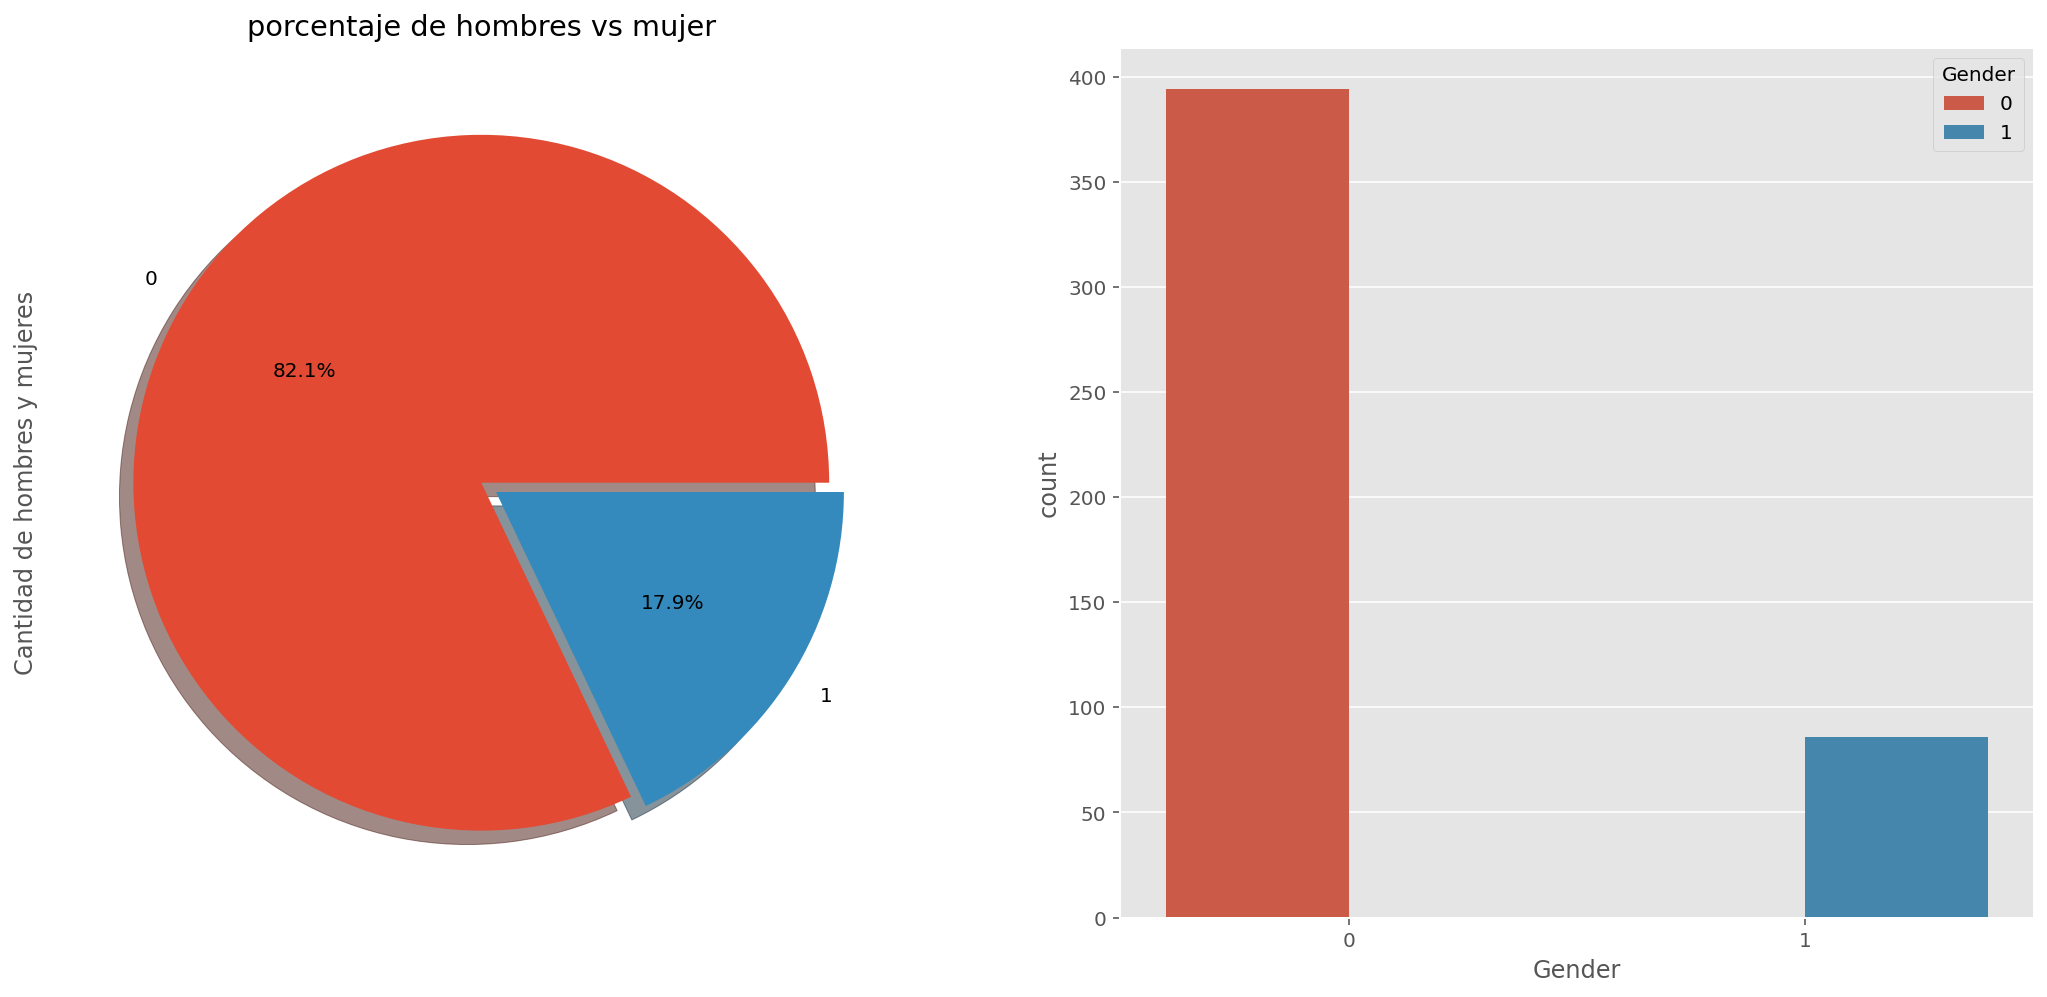

In [140]:
f, ax = plt.subplots(1,2, figsize=(18,8))
datos['Gender'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], explode = [0,0.05], shadow = True)
ax[0].set_title("Genero")
ax[0].set_ylabel("Cantidad de hombres y mujeres")

sns.countplot("Gender", hue="Gender", data=datos, ax = ax[1])
ax[0].set_title("porcentaje de hombres vs mujer")

In [141]:
estado_civil = datos['Married']
casado = []
soltero = []
for estado in estado_civil:
    if estado == 0:
        soltero.append(estado)
    elif estado == 1:
        casado.append(estado)
cantidad_casados = len(casado)
cantidad_solteros = len(soltero)
print(f'la columna genero contiene un total de {len(estado_civil)} registros')
print(f'la base de datos contiene {cantidad_casados} personas casadas y {cantidad_solteros} solteras')

la columna genero contiene un total de 480 registros
la base de datos contiene 311 personas casadas y 169 solteras


C:\Users\JMEJIA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'porcentaje de casados vs solteros')

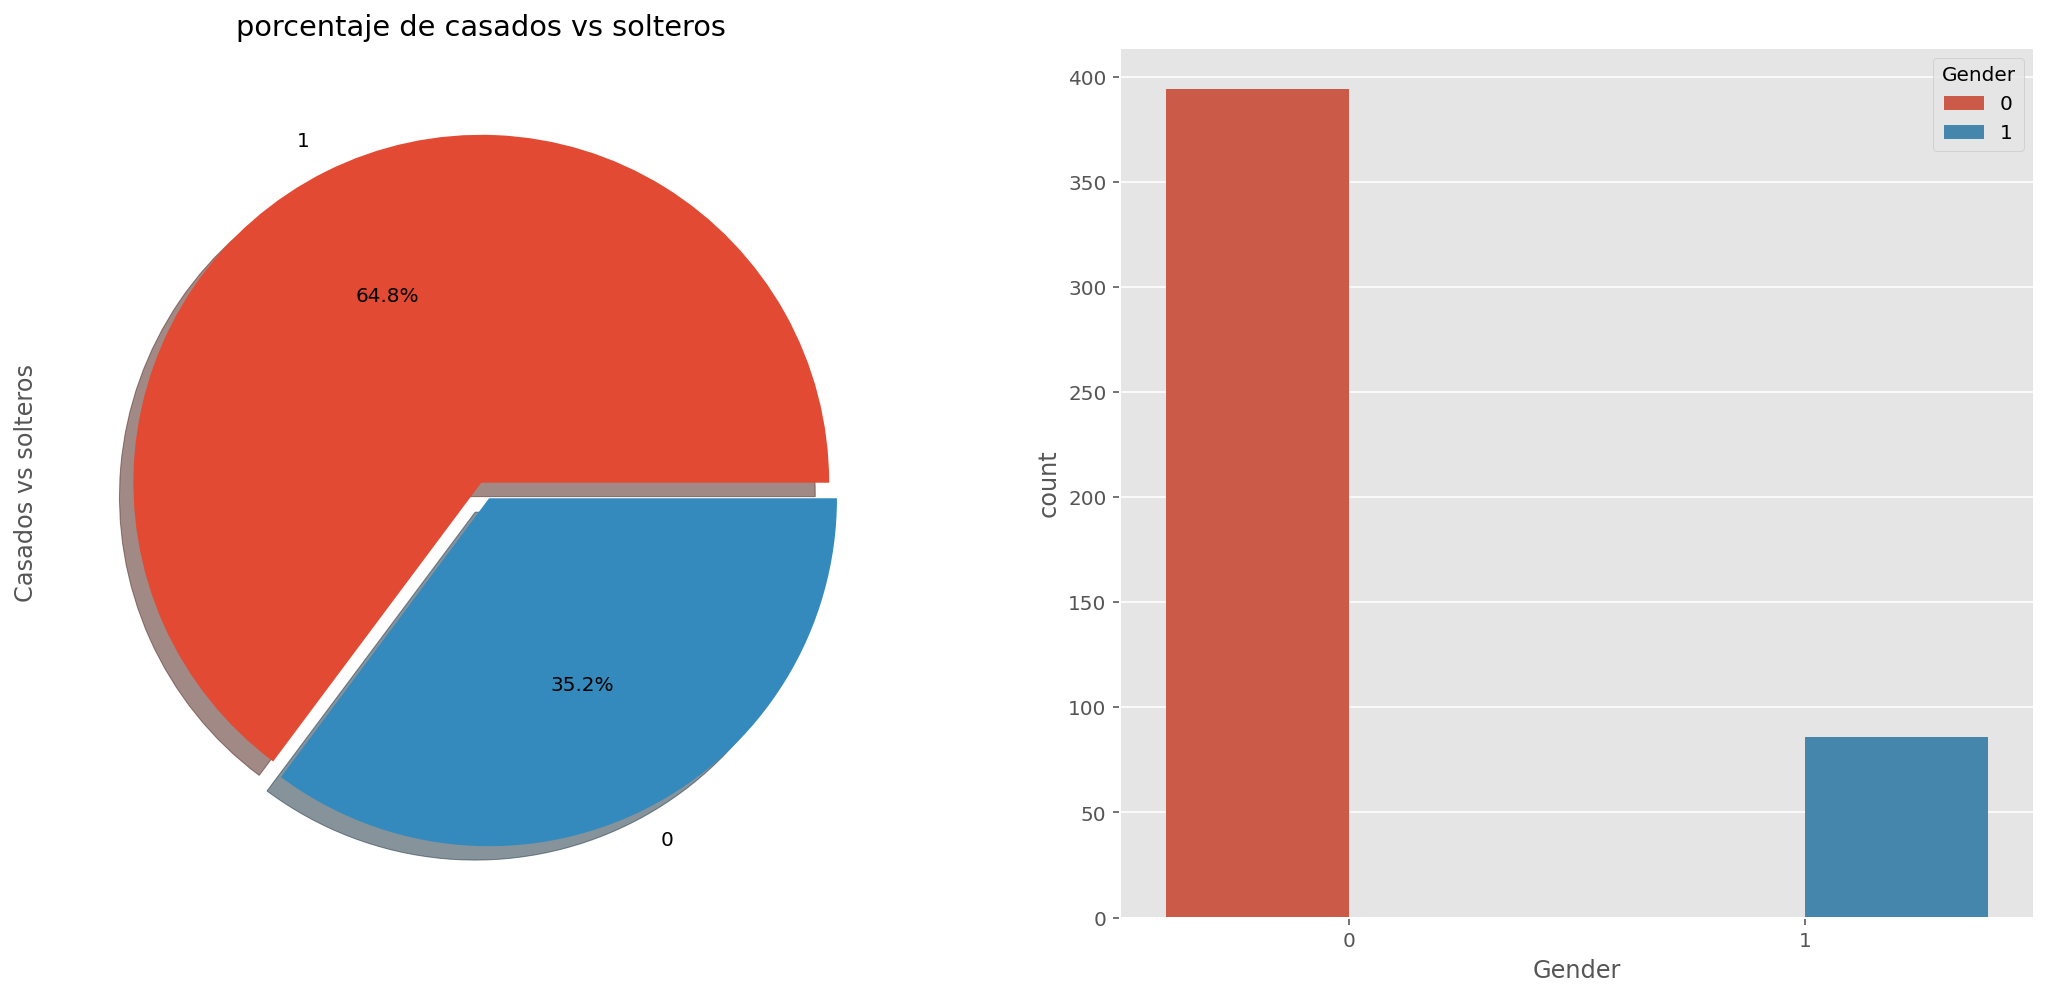

In [142]:
f, ax = plt.subplots(1,2, figsize=(18,8))
datos['Married'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], explode = [0,0.05], shadow = True)
ax[0].set_title("casados")
ax[0].set_ylabel("Casados vs solteros")

sns.countplot("Gender", hue="Gender", data=datos, ax = ax[1])
ax[0].set_title("porcentaje de casados vs solteros")

In [143]:
dependientes = datos['Dependents']
print(type(dependientes[1]))

<class 'str'>


C:\Users\JMEJIA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

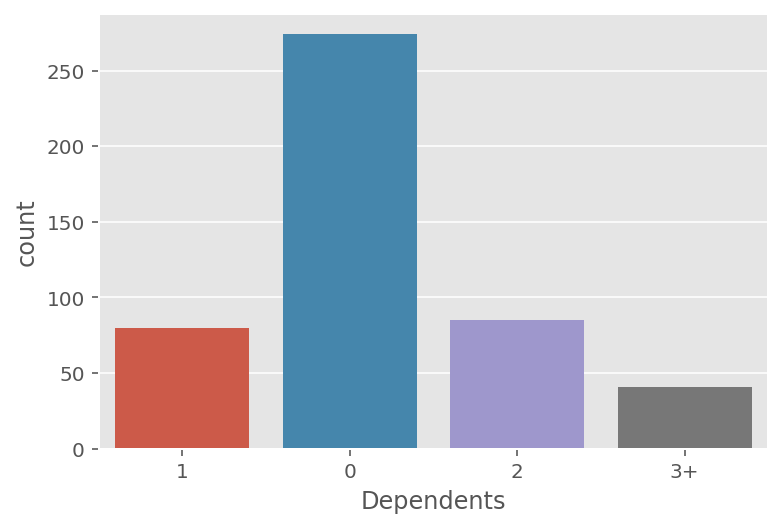

In [144]:
sns.countplot(dependientes)

In [145]:
educacion = datos['Education']

C:\Users\JMEJIA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

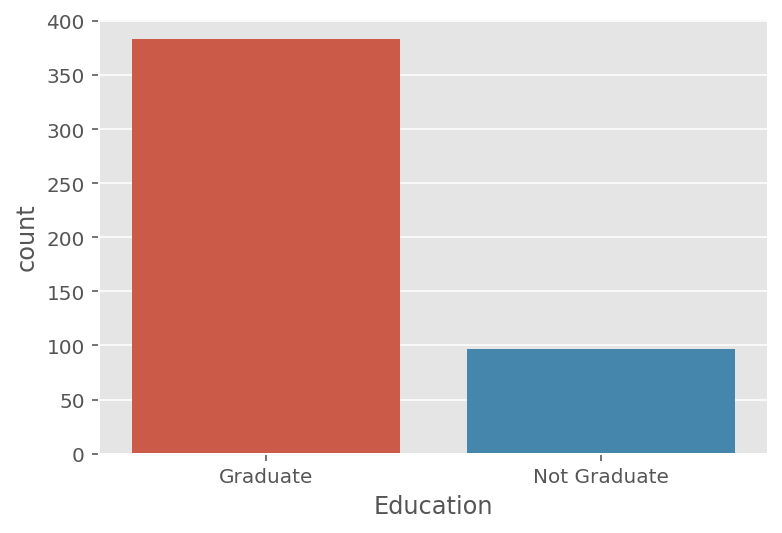

In [146]:
sns.countplot(educacion)

C:\Users\JMEJIA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

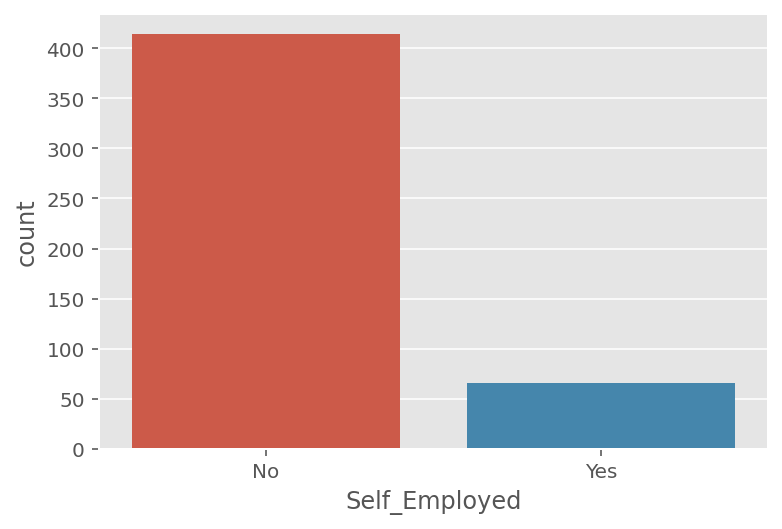

In [147]:
independientes = datos['Self_Employed']
sns.countplot(independientes)

C:\Users\JMEJIA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

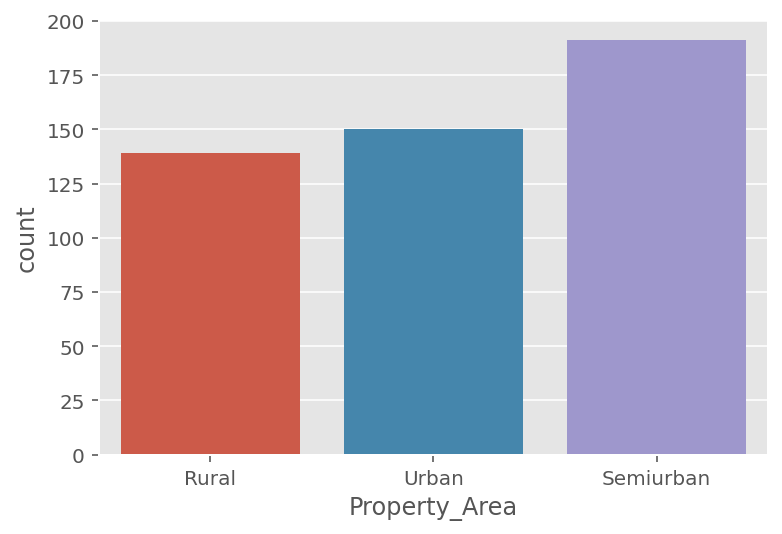

In [148]:
area_vivienda = datos['Property_Area']
sns.countplot(area_vivienda)

In [149]:
monto_prestamo = datos['LoanAmount']
plazo_prestamo = datos['Loan_Amount_Term']
promedio_plazo_prestamo = np.mean(plazo_prestamo)
promedio_momto_prestamo = np.mean(monto_prestamo)
print(f'en promedio se presta un monto de {promedio_momto_prestamo} $ con unpromedio de plazo a {promedio_plazo_prestamo:.0f} dias')

en promedio se presta un monto de 144.73541666666668 $ con unpromedio de plazo a 342 dias


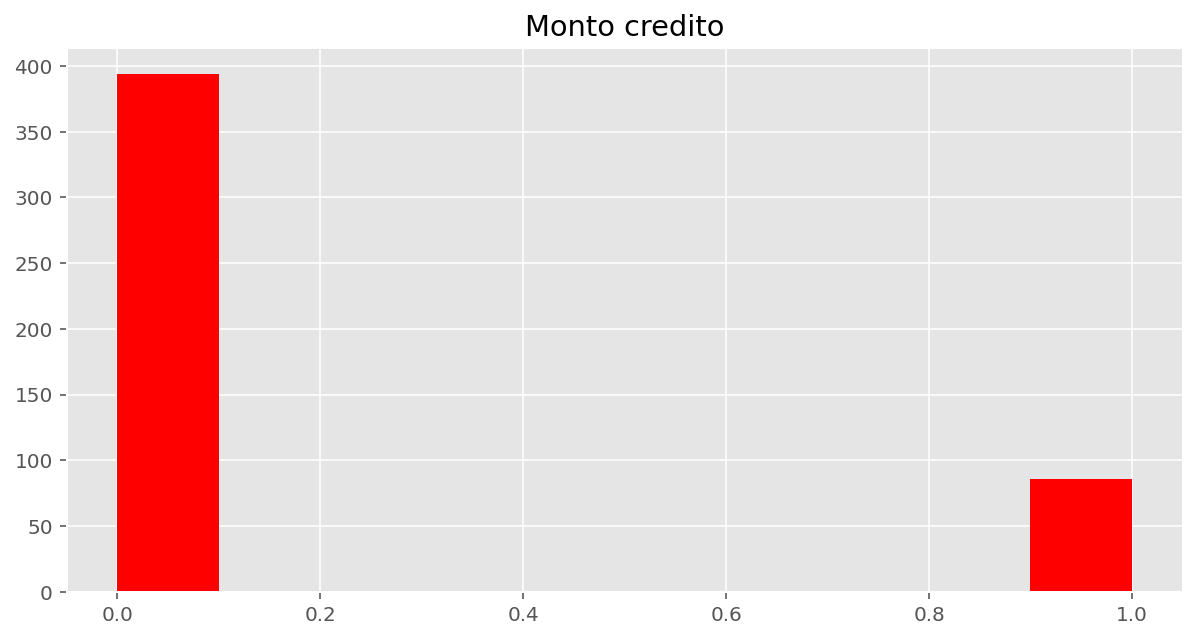

In [150]:
plt.figure(figsize=(10,5))
plt.hist(genero,facecolor="red")
plt.title("Monto credito")
plt.show()

C:\Users\JMEJIA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gender', ylabel='Density'>

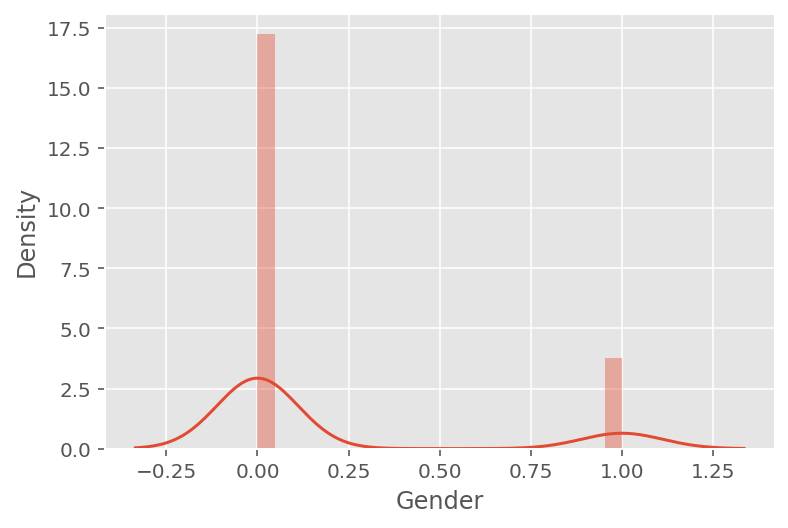

In [151]:
sns.distplot(genero)

C:\Users\JMEJIA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Married', ylabel='Density'>

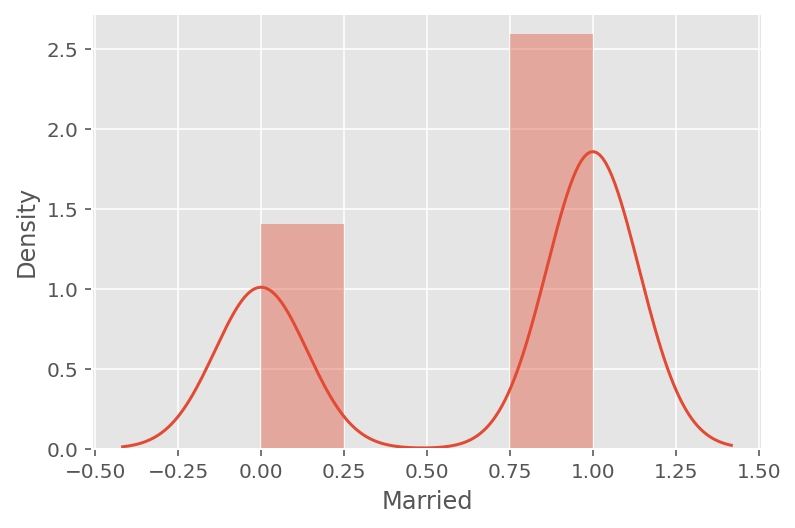

In [152]:
sns.distplot(estado_civil)

C:\Users\JMEJIA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

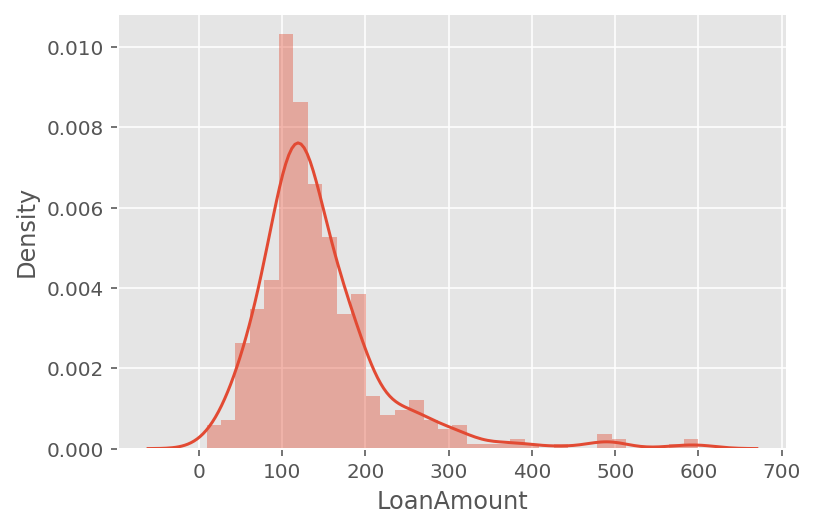

In [153]:
sns.distplot(monto_prestamo)

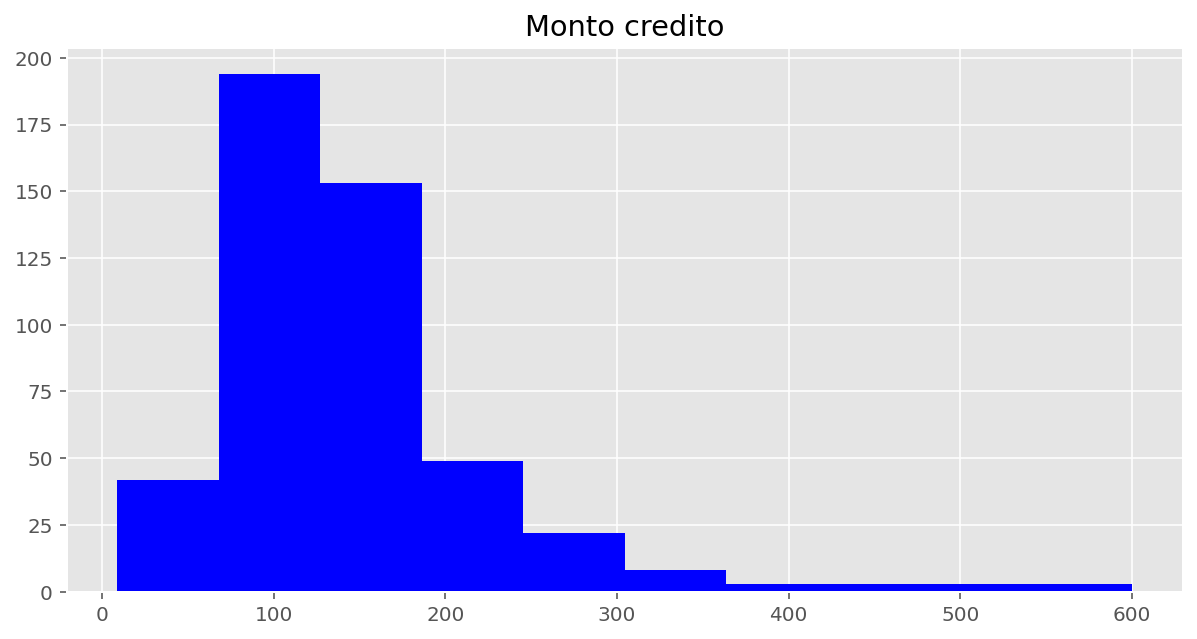

In [154]:
plt.figure(figsize=(10,5))
plt.hist(monto_prestamo,facecolor="blue")
plt.title("Monto credito")
plt.show()

C:\Users\JMEJIA\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


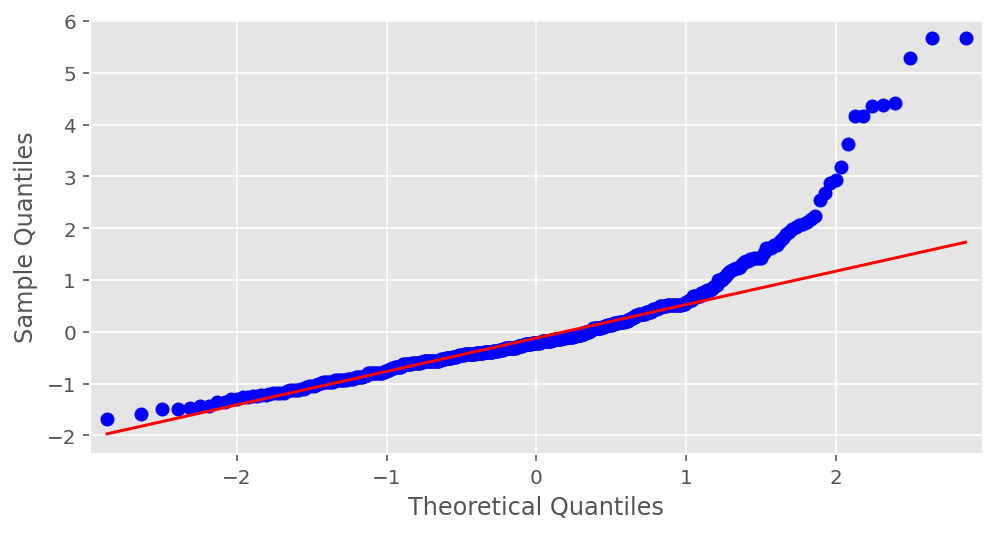

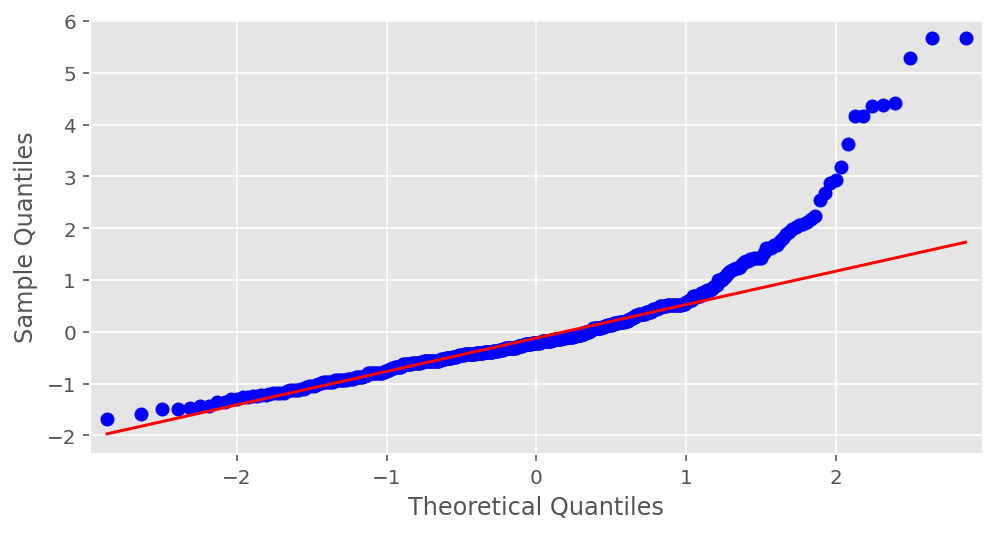

In [155]:
fig,ax=plt.subplots(figsize=(8,4)) # esquema
sm.qqplot(monto_prestamo,fit=True,line="q",ax=ax)

In [156]:
stat,p=shapiro(monto_prestamo)
p

1.7043819484730334e-23

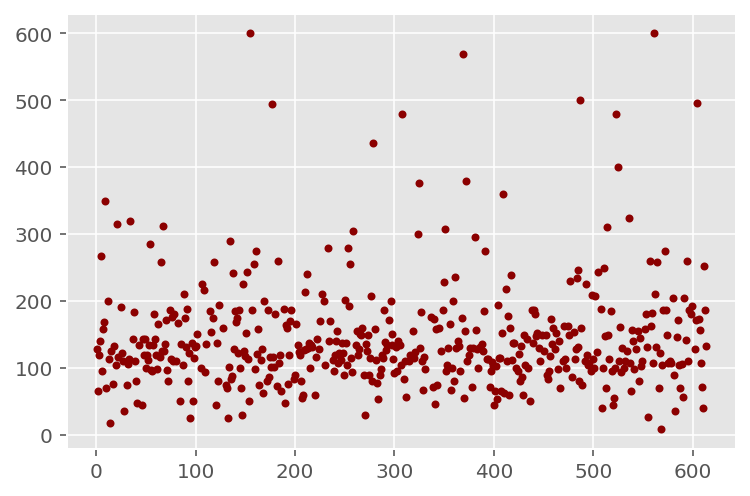

In [157]:
plt.plot(monto_prestamo,".",color="darkred")
plt.show()

<AxesSubplot:xlabel='LoanAmount'>

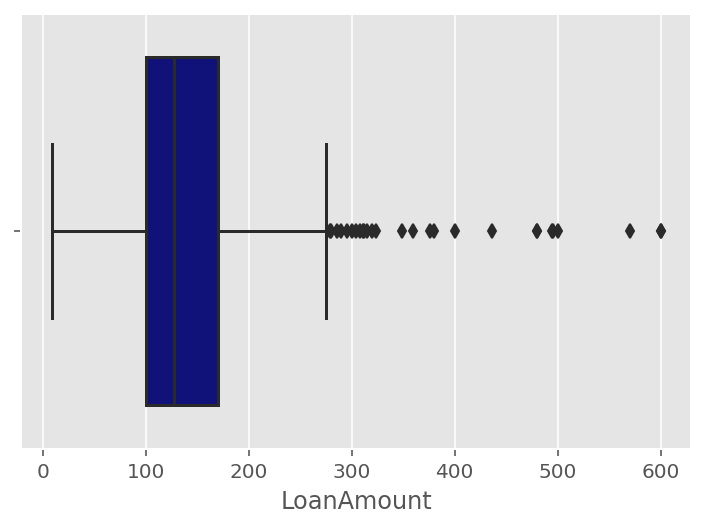

In [158]:
sns.boxplot(x=monto_prestamo,color="darkblue")

<AxesSubplot:ylabel='LoanAmount'>

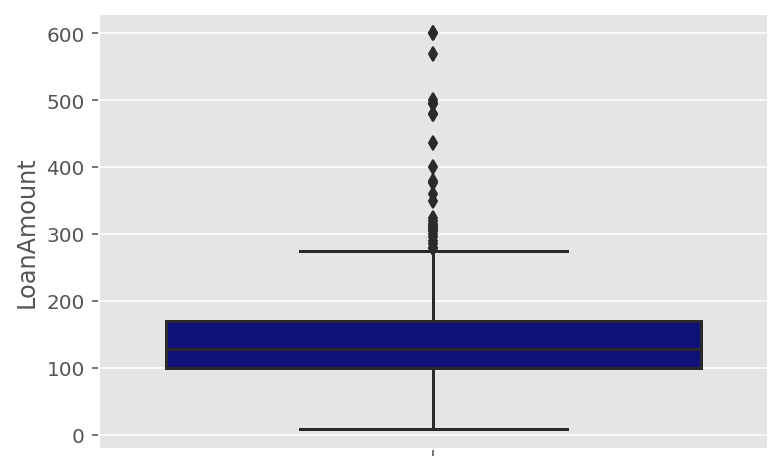

In [159]:
sns.boxplot(y=monto_prestamo,color="darkblue")

In [160]:
monto_prestamo.describe()

count    480.000000
mean     144.735417
std       80.508164
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      600.000000
Name: LoanAmount, dtype: float64

In [161]:
mediana = np.median(monto_prestamo)
q1, q3 = np.percentile(monto_prestamo,[25,75])
RIQ=(q3-q1)
print(f'''
    el promedio del monto de prestamo es: {promedio_momto_prestamo}
    la mediana de monto de prestamos es: {mediana},
    el cuartil q1 es: {q1}
    el cuartil q3 es: {q3}
    el rango inter cuartil es: {R}
''')


    el promedio del monto de prestamo es: 144.73541666666668
    la mediana de monto de prestamos es: 128.0,
    el cuartil q1 es: 100.0
    el cuartil q3 es: 170.0
    el rango inter cuartil es: 70.0



In [162]:
def calcular_mediana(x):
    estadistico=np.median(x)
    return estadistico
def calcular_media(x):
    estadistico=np.mean(x)
    return estadistico

In [163]:
def boostraping(x,fun_estasdistico,n_iteraciones=10000):
    n=len(x)
    dist_boot=np.full(shape=n_iteraciones,fill_value=np.nan) # se crea el vector
    
    for i in tqdm(range(n_iteraciones)):
        resample=np.random.choice(x,size=n,replace=True)
        dist_boot[i]=fun_estasdistico(resample)
        
    return dist_boot 

In [164]:
data = monto_prestamo.sample(n=200,replace=False) 

In [165]:
Promedio_Boost= boostraping(x=data,
                           fun_estasdistico=calcular_media,
                           n_iteraciones=15000)

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 23758.70it/s]


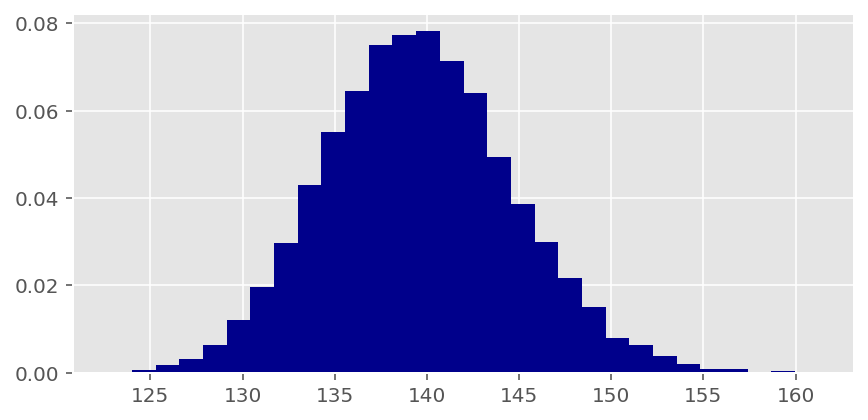

In [166]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(Promedio_Boost,bins=30, density=True,color="darkblue")
plt.show()

In [167]:
cuantiles = np.quantile(a = Promedio_Boost, q = [0.025, 0.975])

In [168]:
cuantiles[0]

130.105

In [169]:
cuantiles[1]

150.095125

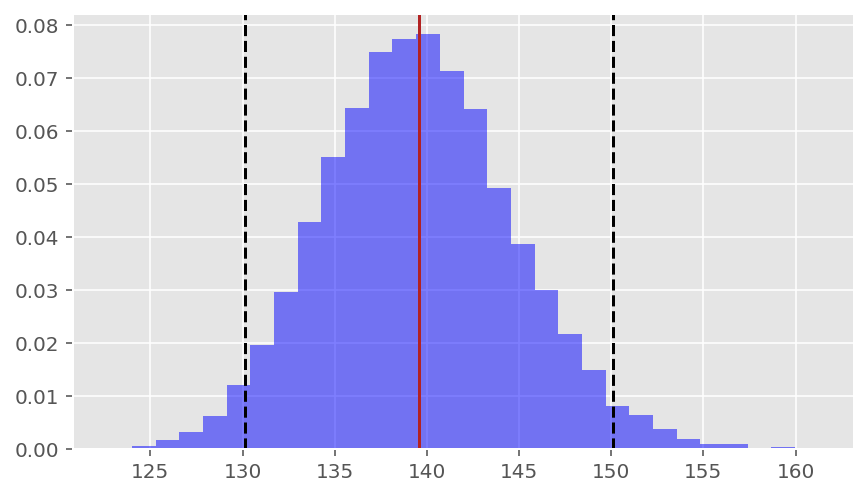

In [173]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(Promedio_Boost,bins=30, density=True,color="blue", alpha=0.5)
ax.axvline(x=data.mean(), color='firebrick', label='media observada')
ax.axvline(x=cuantiles[0], color='black', linestyle='--', label='IC 95%')
ax.axvline(x=cuantiles[1], color='black', linestyle='--')
plt.show()

## Analicis bivariado

**Correlación de Pearson**

La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

* 1: correlación lineal positiva total.
* 0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.
* -1: correlación lineal negativa total

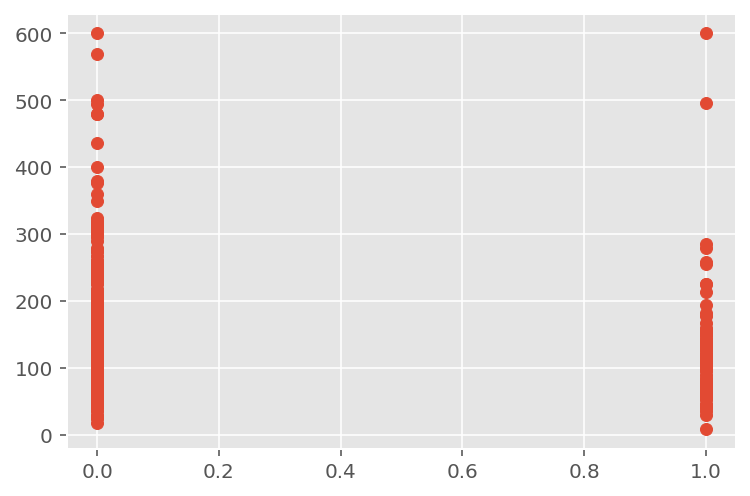

In [181]:
plt.scatter(genero,monto_prestamo)
plt.show()

In [185]:
pearsonr(genero,monto_prestamo)[0]

-0.098975133623453

In [188]:
pearsonr(genero,monto_prestamo)[1]

0.03015041681014983

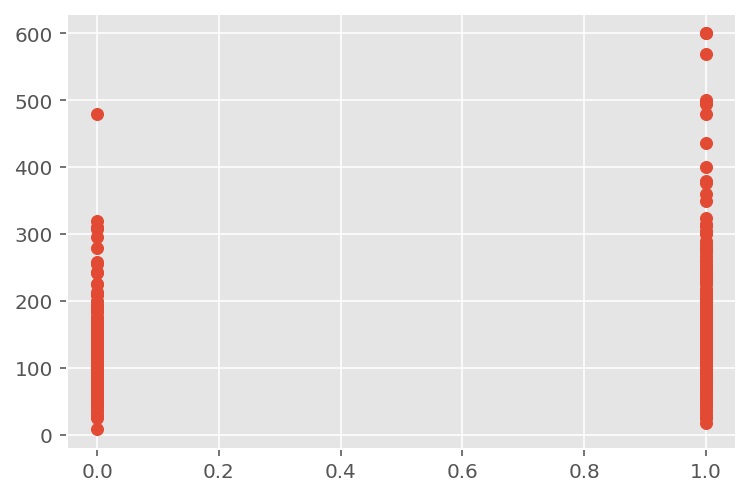

In [189]:
plt.scatter(estado_civil,monto_prestamo)
plt.show()

In [190]:
pearsonr(estado_civil,monto_prestamo)[0]

0.18344236653877227

In [191]:
pearsonr(estado_civil,monto_prestamo)[1]

5.279411890050932e-05

In [193]:
estado_prestamo = datos['Loan_Status']


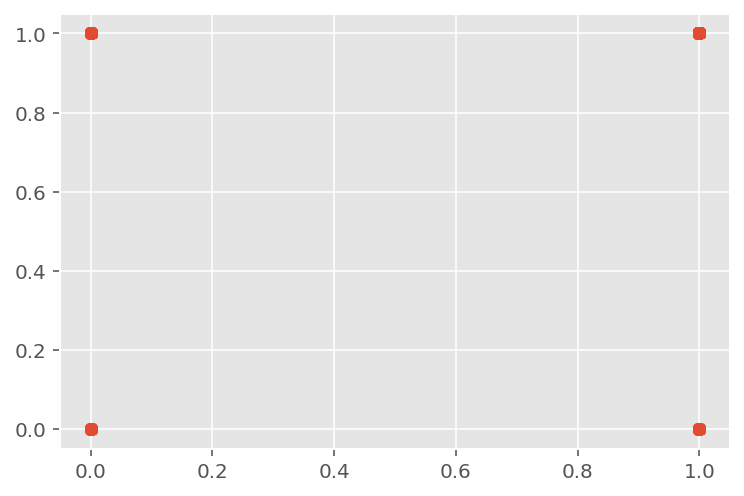

In [194]:
plt.scatter(estado_civil,estado_prestamo)
plt.show()

In [196]:
pearsonr(estado_civil, estado_prestamo)[0]

0.1123208853557702

In [197]:
pearsonr(estado_civil, estado_prestamo)[1]

0.013808489727372916

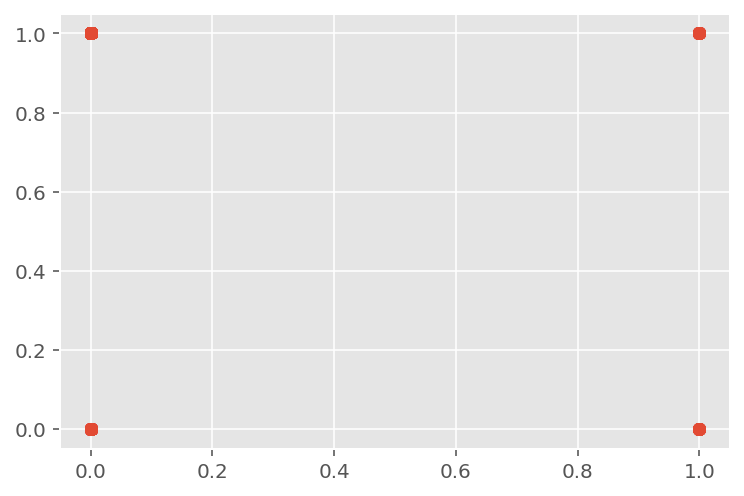

In [198]:
plt.scatter(genero,estado_prestamo)
plt.show()

In [199]:
pearsonr(genero, estado_prestamo)[1]

0.15824359868779272

In [200]:
pearsonr(genero, estado_prestamo)[0]

-0.06450429735951989

In [201]:
matrix_de_correlacion = datos.corr()

In [202]:
matrix_de_correlacion

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.000000,-0.349424,-0.032644,-0.156171,-0.098975,0.088704,-0.022447,-0.064504
Married,-0.349424,1.000000,0.036717,0.102950,0.183442,-0.107504,0.029095,0.112321
ApplicantIncome,-0.032644,0.036717,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.156171,0.102950,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,-0.098975,0.183442,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,0.088704,-0.107504,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.022447,0.029095,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,-0.064504,0.112321,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


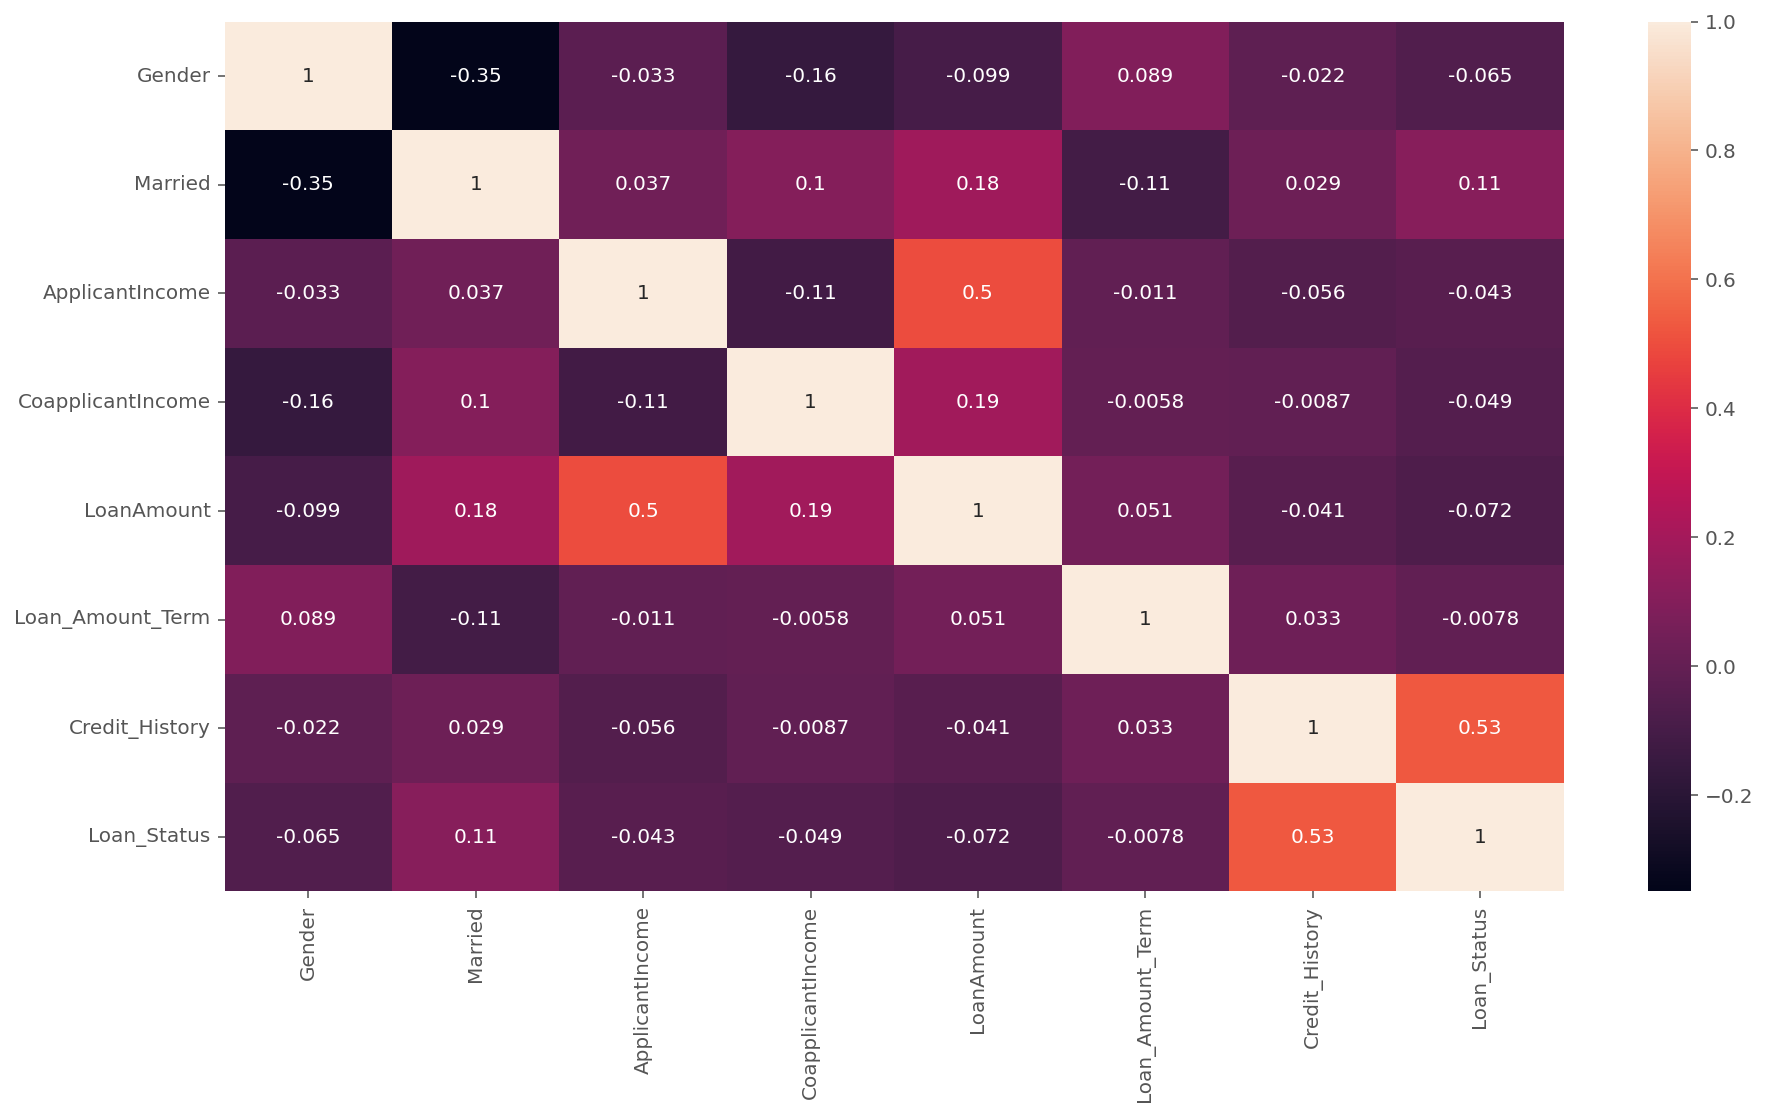

In [203]:
fig,ax=plt.subplots(figsize=(15,8)) # esquema
sns.heatmap(matrix_de_correlacion,annot = True)
plt.show()

In [221]:
X = datos[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]

In [222]:
Y = datos['Loan_Status']

<function matplotlib.pyplot.show(close=None, block=None)>

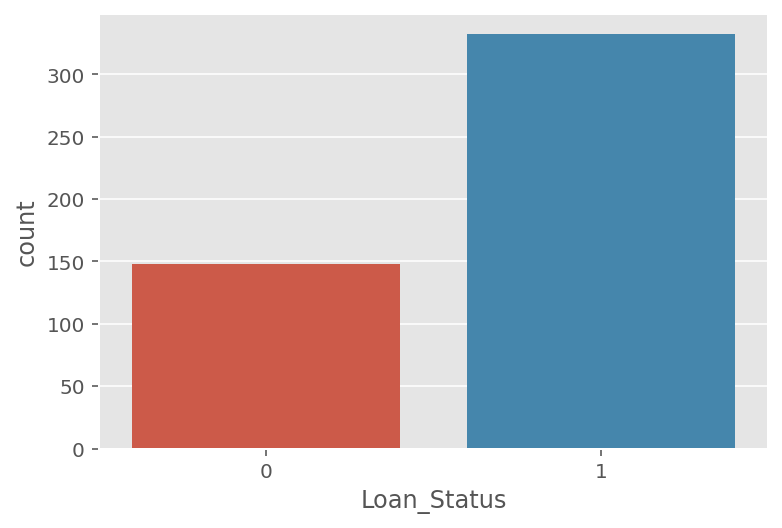

In [223]:
sns.countplot(Y)
plt.show

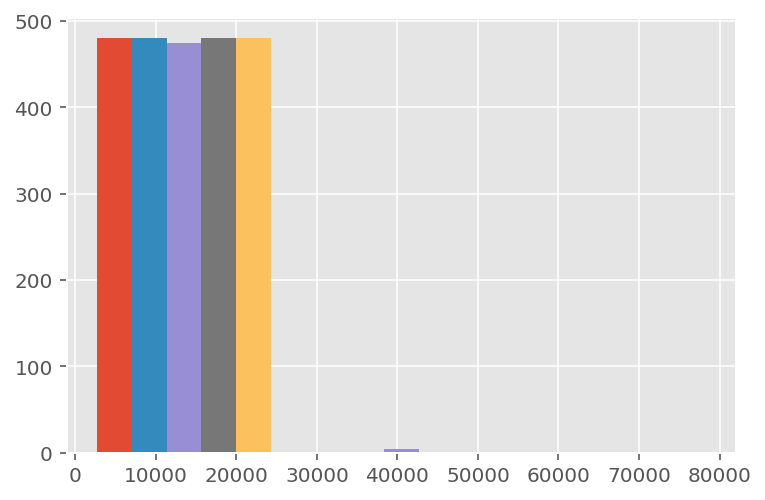

In [230]:
plt.hist(X, bins=3)
plt.show()

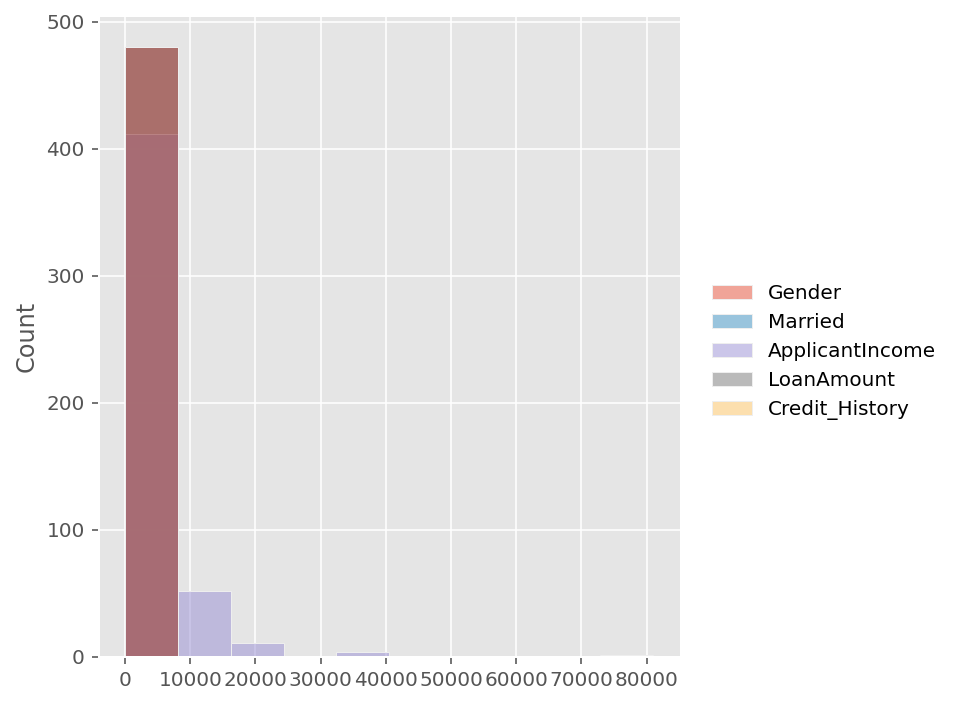

In [234]:
sns.displot(X, bins=10)

<AxesSubplot:ylabel='Loan_Status'>

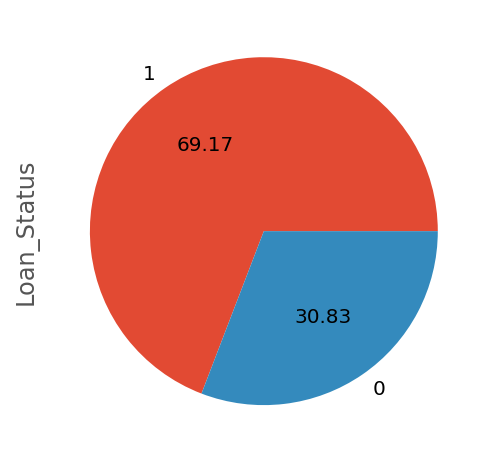

### Division de datos entre 75 % para entreno y 25 % test

In [236]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=10,stratify=Y)

<center><h1>El primero modelo sera arbo de deciciones</h1></center>

<img src="images/random.png" width=500>

In [240]:
arbol_de_decicon_modelo =DecisionTreeClassifier(criterion="gini",random_state=123)


## Entrenando el modelo

In [262]:
arbol_de_decicon_modelo.fit(x_train, y_train)
arbol_de_decicon_modelo

DecisionTreeClassifier(random_state=123)

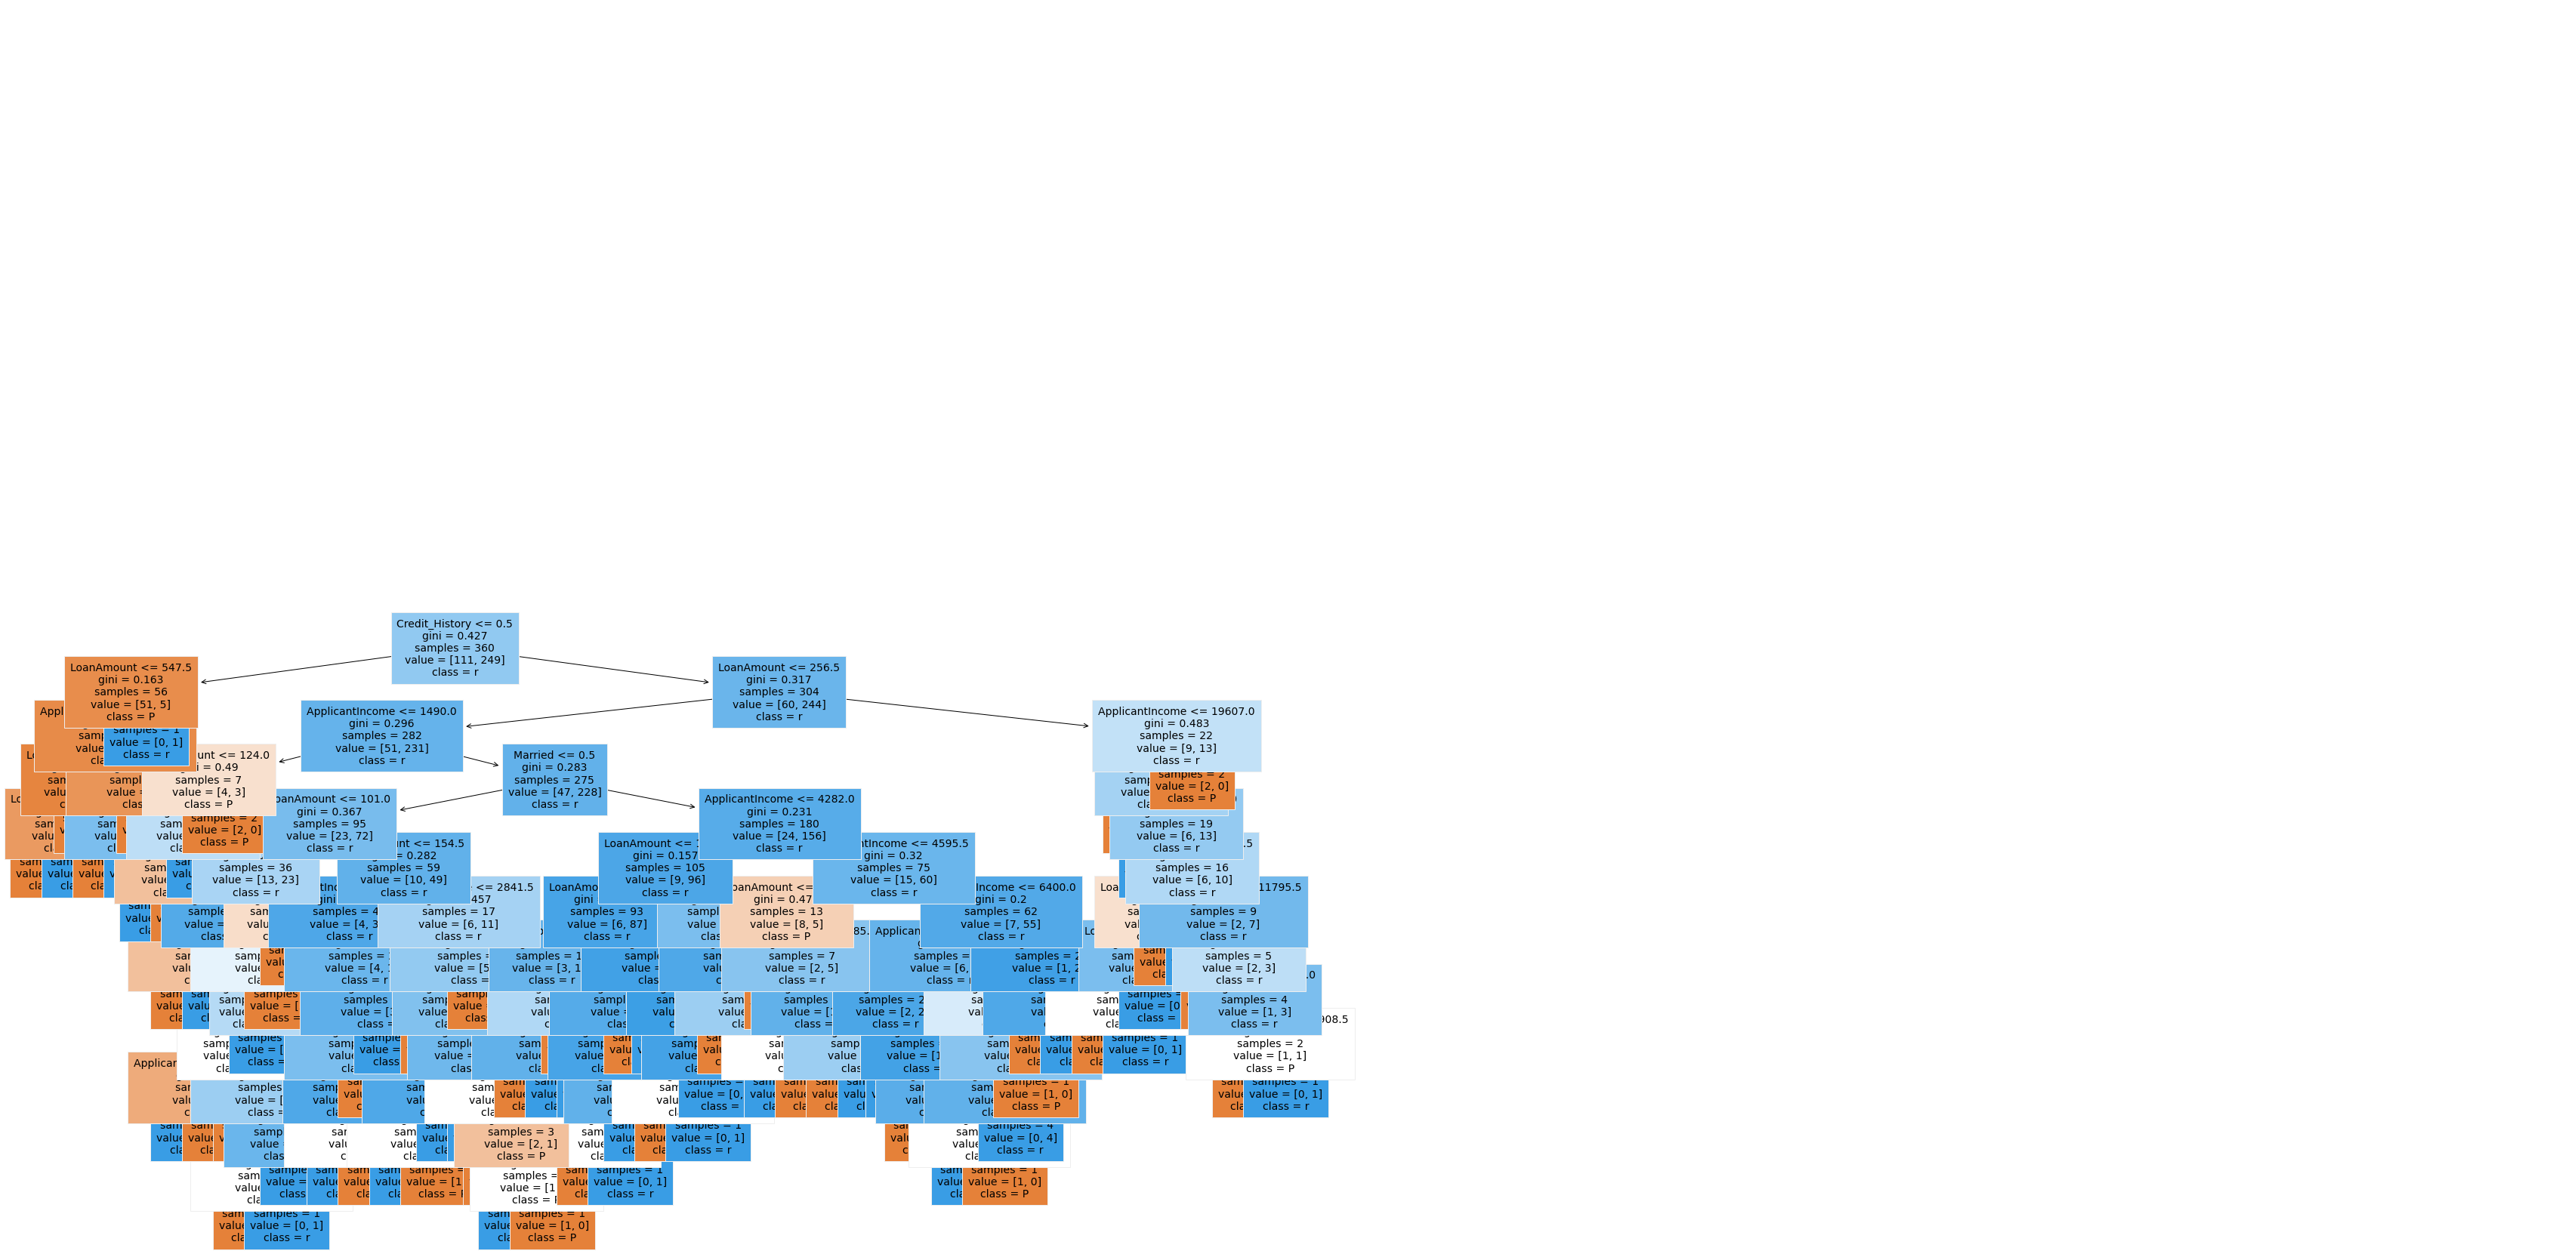

In [242]:
fig, ax = plt.subplots(figsize=(30, 15))
plot=plot_tree(decision_tree=arbol_de_decicon_modelo,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="Prediccion de Default Credito",
                ax            = ax
              )

In [244]:
texto_modelo=export_text( decision_tree=arbol_de_decicon_modelo,
                         feature_names=list(x_train.columns)
                        )
print(texto_modelo)

|--- Credit_History <= 0.50
|   |--- LoanAmount <= 547.50
|   |   |--- ApplicantIncome <= 4658.50
|   |   |   |--- LoanAmount <= 94.50
|   |   |   |   |--- LoanAmount <= 83.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- LoanAmount >  83.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- LoanAmount >  94.50
|   |   |   |   |--- class: 0
|   |   |--- ApplicantIncome >  4658.50
|   |   |   |--- ApplicantIncome <= 5392.50
|   |   |   |   |--- LoanAmount <= 116.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- LoanAmount >  116.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- ApplicantIncome >  5392.50
|   |   |   |   |--- class: 0
|   |--- LoanAmount >  547.50
|   |   |--- class: 1
|--- Credit_History >  0.50
|   |--- LoanAmount <= 256.50
|   |   |--- ApplicantIncome <= 1490.00
|   |   |   |--- LoanAmount <= 124.00
|   |   |   |   |--- LoanAmount <= 111.00
|   |   |   |   |   |--- LoanAmount <= 26.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- 

In [245]:
pd.options.display.max_rows=100

In [247]:
Importancia_Predictores=pd.DataFrame(
{"predictor":x_train.columns,
 "Importancia":arbol_de_decicon_modelo.feature_importances_})

Importancia_Predictores.sort_values("Importancia",ascending=False)

,predictor,Importancia
2,ApplicantIncome,0.356630
4,Credit_History,0.313429
3,LoanAmount,0.306332
0,Gender,0.014027
1,Married,0.009582


In [248]:
predicciones_train_AD=arbol_de_decicon_modelo.predict(X=x_train)
predicciones_train_AD

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,

In [264]:
metrics.confusion_matrix(y_train,predicciones_train_AD)

array([[111,   0],
       [  0, 249]], dtype=int64)

In [266]:
accuracy_train_AD = metrics.accuracy_score(y_train,predicciones_train_AD)
print(accuracy_train_AD)

1.0


## Reporte de entrenamiento

In [267]:
reporte_trein_arborD = metrics.classification_report(y_train,predicciones_train_AD)
print(reporte_trein_arborD)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       249

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



In [268]:
predicciones_test_AD = arbol_de_decicon_modelo.predict(X=x_test)
predicciones_test_AD

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [269]:
metrics.confusion_matrix(y_test,predicciones_test_AD)

array([[16, 21],
       [17, 66]], dtype=int64)

In [270]:
accuracy_test_arboD = metrics.accuracy_score(y_test,predicciones_test_AD)
print(f'El accuraci del test de arbD es de: {accuracy_test_arboD}')

El accuraci del test de arbD es de: 0.6833333333333333


In [271]:
precision, recall, fscore, support = score(y_test,predicciones_test_AD)
f1_Score_AD_0=fscore[0]
f1_Score_AD_1=fscore[1]

In [272]:
print(f'''
    f1_Score_AD_0 = {f1_Score_AD_0}
    f1_Score_AD_1 = {f1_Score_AD_1}
''')


    f1_Score_AD_0 = 0.45714285714285713
    f1_Score_AD_1 = 0.7764705882352942



## optimizacion

In [273]:
f=arbol_de_decicon_modelo
f.get_n_leaves()
f.get_depth() # Profundida

f_alpha = f.cost_complexity_pruning_path(x_train, y_train)
alphas = f_alpha['ccp_alphas']
impurs = f_alpha['impurities']

fs=[] # Guarda Modelos con Tasas de complejidad alpha

for j in alphas:
    f = DecisionTreeClassifier(ccp_alpha=j, random_state=77)
    f.fit(x_train, y_train)
    fs.append(f)
    
nodes = []
depth = []   

for j in range(0, alphas.shape[0]):
    nodes.append(fs[j].tree_.node_count)
    depth.append(fs[j].tree_.max_depth)

In [274]:
results = {'alpha': alphas, 'Imputiry': impurs, 'Nodes': nodes, 'Depth': depth}
results = pd.DataFrame(results, columns = ['alpha', 'Imputiry', 'Nodes', 'Depth'])
results

,alpha,Imputiry,Nodes,Depth
0,0.000000,0.000000,173,13
1,0.001728,0.005185,167,13
2,0.001821,0.010650,161,13
3,0.001852,0.014353,157,13
4,0.001852,0.016205,155,13
5,0.002083,0.020372,147,13
6,0.002083,0.024539,147,13
7,0.002222,0.028983,143,12
8,0.002238,0.033458,143,12
9,0.002315,0.038088,131,12


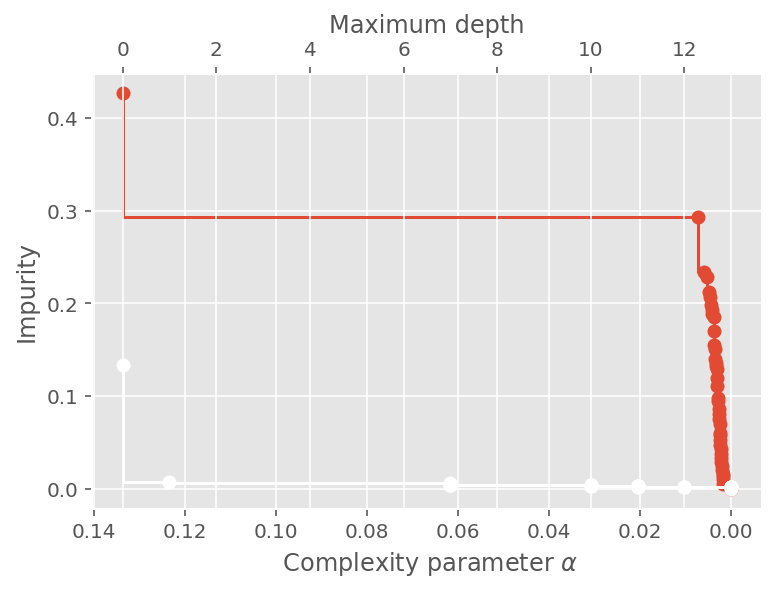

In [275]:
fig, ax = plt.subplots()
plt.plot(alphas, impurs, marker='o', drawstyle='steps-post')
ax.invert_xaxis()
plt.xlabel(r' Complexity parameter $\alpha$')
plt.ylabel('Impurity')
ax1 = ax.twiny()
plt.plot(depth, alphas, marker='o', drawstyle="steps-post", color='w')
plt.xlabel('Maximum depth')
plt.show()

In [276]:
train_scores = [f.score(x_train, y_train) for f in fs]
test_scores  = [f.score(x_test, y_test)   for f in fs]

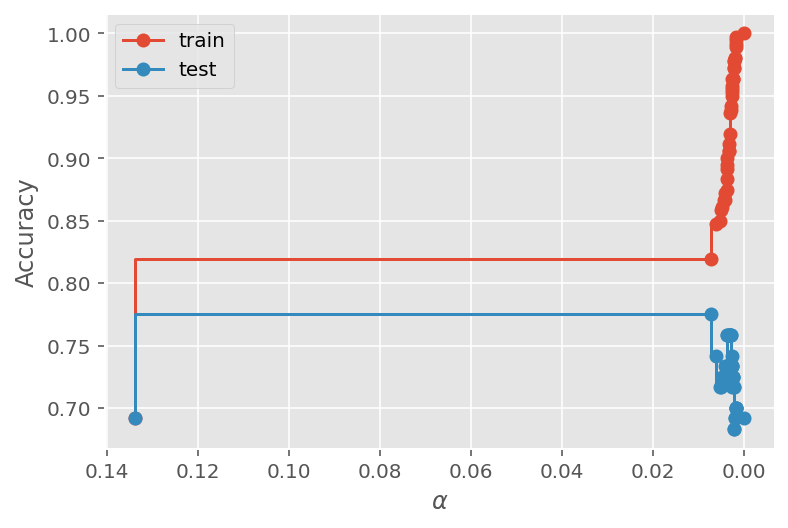

In [277]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Accuracy')
ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores,  marker='o', label='test',  drawstyle='steps-post')
ax.invert_xaxis()
ax.legend()
plt.show()

In [278]:
f = DecisionTreeClassifier(random_state=77)
max_depth = range(1, 31, 1)
min_samples_leaf= range(1,10, 1)

In [281]:
param_grid = dict(max_depth = max_depth , min_samples_leaf = min_samples_leaf)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(f, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 0)
grid_result = grid_search.fit(x_train, y_train)

In [282]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.819444 using {'max_depth': 1, 'min_samples_leaf': 1}


In [284]:
arbol_optimo_accuracy=DecisionTreeClassifier(criterion='gini',
                                             max_depth=4, # Profundidad Optima
                                             ccp_alpha=0,
                                             random_state=77)
arbol_optimo_accuracy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=4, random_state=77)

In [286]:
print('Depth:', arbol_optimo_accuracy.get_depth())

Depth: 4


In [287]:
print('Nodos:', arbol_optimo_accuracy.get_n_leaves())

Nodos: 12


## Evaluar modelo

In [290]:
predicciones_train_AD1=arbol_optimo_accuracy.predict(X=x_train)
predicciones_train_AD1

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,

In [291]:
accuracy_train_AD_optimo=metrics.accuracy_score(y_train,predicciones_train_AD1)
print(f'el accuracy con el arbor optimizado es de: {accuracy_train_AD_optimo}')

el accuracy con el arbor optimizado es de: 0.8416666666666667


In [292]:
reporte_trian_AD_optimo=metrics.classification_report(y_train,predicciones_train_AD1)
print(reporte_trian_AD_optimo)

              precision    recall  f1-score   support

           0       0.98      0.50      0.66       111
           1       0.82      1.00      0.90       249

    accuracy                           0.84       360
   macro avg       0.90      0.75      0.78       360
weighted avg       0.87      0.84      0.82       360



In [293]:
predicciones_test_AD_optimo = arbol_optimo_accuracy.predict(X=x_test)

In [295]:
accuracy_test_AD_optimo=metrics.accuracy_score(y_test,predicciones_test_AD_optimo)
print(accuracy_test_AD_optimo)

0.7833333333333333


In [297]:
reporte_test_AD_optimo=metrics.classification_report(y_test,predicciones_test_AD_optimo)
print(reporte_test_AD_optimo)

              precision    recall  f1-score   support

           0       0.87      0.35      0.50        37
           1       0.77      0.98      0.86        83

    accuracy                           0.78       120
   macro avg       0.82      0.66      0.68       120
weighted avg       0.80      0.78      0.75       120



In [298]:
precision, recall, fscore, support = score(y_test,predicciones_test_AD_optimo)
f1_Score_AD_Op_0=fscore[0]
f1_Score_AD_Op_1=fscore[1]
f1_Score_AD_Op_1

0.8617021276595745

In [299]:
predicciones_test_AD_optimo[1:5]

array([1, 1, 1, 1], dtype=int64)

## Calibrar modelo

In [306]:
Probabilidades_Test_AD_Optimo=arbol_optimo_accuracy.predict_proba(X=x_test)
Probabilidades_Test_AD_Optimo
df_predicciones=pd.DataFrame(data=Probabilidades_Test_AD_Optimo,columns=["0","1"])
df_predicciones.head(10)

,0,1
0,1.000000,0.000000
1,0.242105,0.757895
2,0.133333,0.866667
3,0.133333,0.866667
4,0.242105,0.757895
5,0.242105,0.757895
6,1.000000,0.000000
7,0.133333,0.866667
8,0.242105,0.757895
9,0.242105,0.757895


In [308]:
realidad=y_test.reset_index(drop=True)
base=x_test
base=base.reset_index()
base["PREDICCION_AD"]=predicciones_test_AD_optimo
base["PROBABILIDADES_0"]=df_predicciones["0"]
base["PROBABILIDADES_1"]=df_predicciones["1"]
base["Realidad"]=realidad

In [309]:
base.head(10)

,index,Gender,Married,ApplicantIncome,LoanAmount,Credit_History,PREDICCION_AD,PROBABILIDADES_0,PROBABILIDADES_1,Realidad
0,122,1,0,2137,137.0,0.0,0,1.000000,0.000000,1
1,401,0,0,2755,65.0,1.0,1,0.242105,0.757895,0
2,68,0,1,7100,125.0,1.0,1,0.133333,0.866667,1
3,281,0,1,3927,112.0,1.0,1,0.133333,0.866667,1
4,440,0,0,3660,187.0,1.0,1,0.242105,0.757895,1
5,194,0,0,4191,120.0,1.0,1,0.242105,0.757895,1
6,613,1,0,4583,133.0,0.0,0,1.000000,0.000000,0
7,606,0,1,3400,173.0,1.0,1,0.133333,0.866667,1
8,229,0,0,6400,200.0,1.0,1,0.242105,0.757895,1
9,360,1,0,4723,81.0,1.0,1,0.242105,0.757895,0


In [310]:
prob_positivo = Probabilidades_Test_AD_Optimo[:, 1]

In [311]:
fraccion_positivos, media_prob_predicha = calibration_curve(y_test, prob_positivo, n_bins=20)

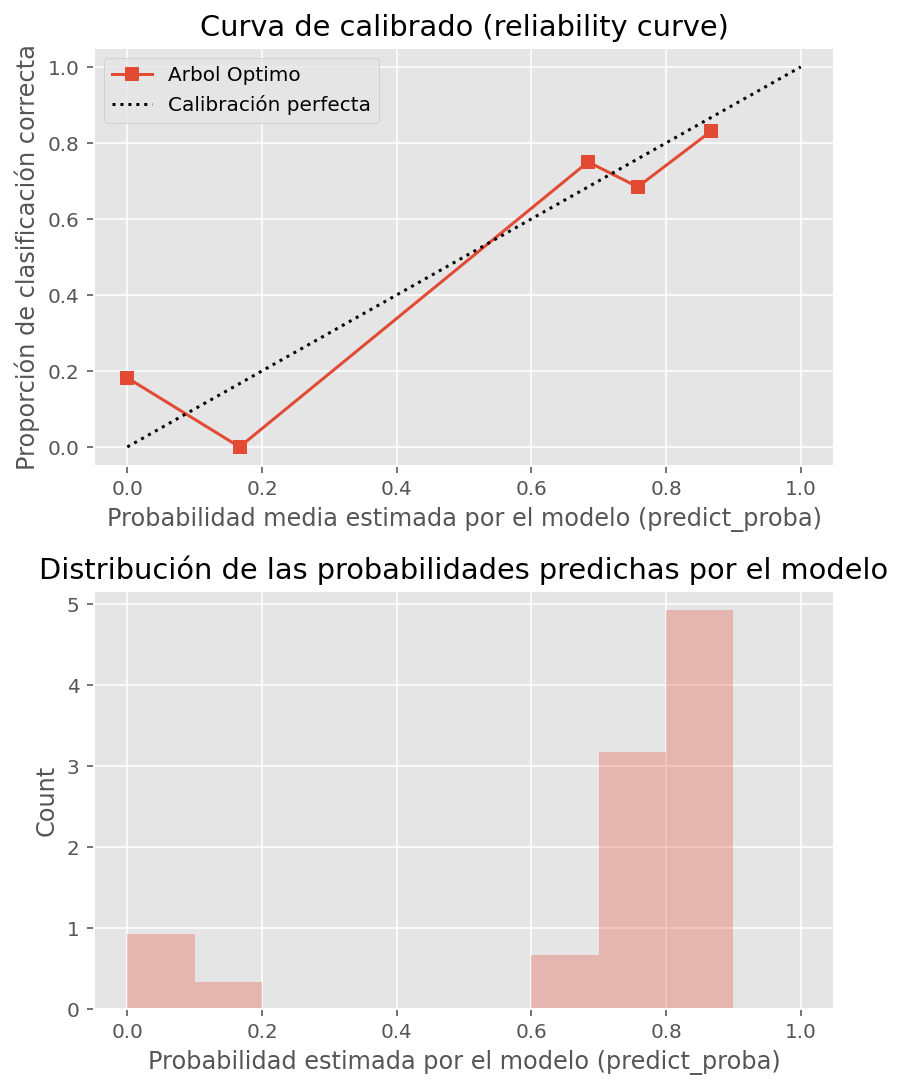

In [312]:
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(6, 2*3.84))
axs[0].plot(media_prob_predicha, fraccion_positivos, "s-", label="Arbol Optimo")
axs[0].plot([0, 1], [0, 1], "k:", label="Calibración perfecta")
axs[0].set_ylabel("Proporción de clasificación correcta")
axs[0].set_xlabel("Probabilidad media estimada por el modelo (predict_proba)")
axs[0].set_title('Curva de calibrado (reliability curve)')
axs[0].legend()

axs[1].hist(prob_positivo, range=(0, 1), bins=10, density=True, lw=2, alpha = 0.3)
axs[1].set_xlabel("Probabilidad estimada por el modelo (predict_proba)")
axs[1].set_ylabel("Count")
axs[1].set_title('Distribución de las probabilidades predichas por el modelo')

plt.tight_layout()
plt.show();

In [314]:
modelo_calibrado = CalibratedClassifierCV(arbol_optimo_accuracy, cv=3, method='isotonic')
_ = modelo_calibrado.fit(x_train, y_train)

In [315]:
Probabilidades  = modelo_calibrado.predict_proba(X = x_test)
# Se extraen las probabilidades de la clase positiva
prob_positivo = Probabilidades[:, 1]

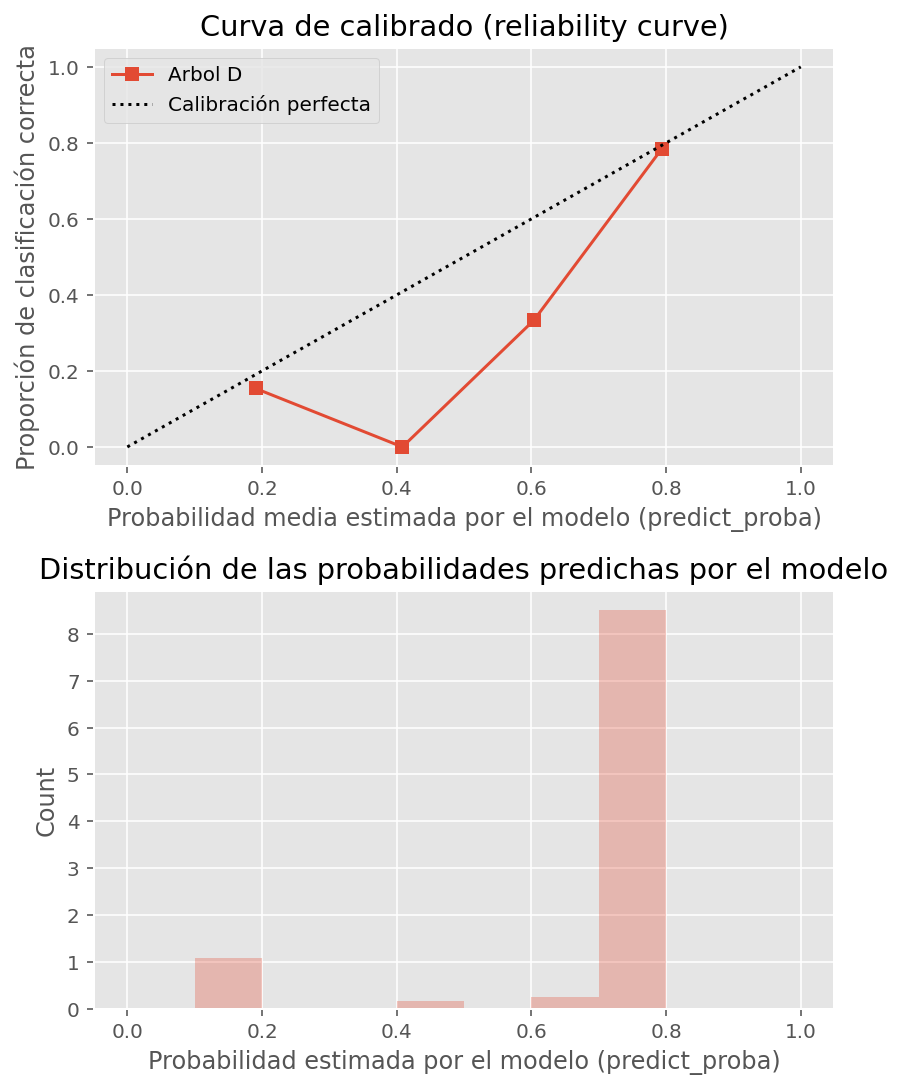

In [316]:
fraccion_positivos, media_prob_predicha = calibration_curve(y_test, prob_positivo, n_bins=20)
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(6, 2*3.84))

axs[0].plot(media_prob_predicha, fraccion_positivos, "s-", label="Arbol D")
axs[0].plot([0, 1], [0, 1], "k:", label="Calibración perfecta")
axs[0].set_ylabel("Proporción de clasificación correcta")
axs[0].set_xlabel("Probabilidad media estimada por el modelo (predict_proba)")
axs[0].set_title('Curva de calibrado (reliability curve)')
axs[0].legend()

axs[1].hist(prob_positivo, range=(0, 1), bins=10, density=True, lw=2, alpha = 0.3)
axs[1].set_xlabel("Probabilidad estimada por el modelo (predict_proba)")
axs[1].set_ylabel("Count")
axs[1].set_title('Distribución de las probabilidades predichas por el modelo')

plt.tight_layout()
plt.show();

In [330]:
Importancia_Predictores=pd.DataFrame(
{"predictor":x_train.columns,
 "Importancia":arbol_optimo_accuracy.feature_importances_})

Importancia_Predictores.sort_values("Importancia",ascending=False)

,predictor,Importancia
4,Credit_History,0.760185
2,ApplicantIncome,0.121707
3,LoanAmount,0.094867
1,Married,0.023241
0,Gender,0.000000


## Random Forest

In [331]:
Modelo_RF=RandomForestClassifier(criterion='gini',  n_estimators=100,bootstrap=True,random_state=77)
Modelo_RF=Modelo_RF.fit(x_train,y_train)

In [332]:
Predicciones_train_RF=Modelo_RF.predict(X=x_train)
Accuracy_RF_train=metrics.accuracy_score(y_train,Predicciones_train_RF)
print(Accuracy_RF_train)
Reporte_RF=metrics.classification_report(y_train,Predicciones_train_RF)
print(Reporte_RF)
precision, recall, fscore, support = score(y_train,Predicciones_train_RF)
f1_Score_RF_0=fscore[0]
f1_Score_RF_1=fscore[1]

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       249

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



## Test

In [333]:
Predicciones_test_RF=Modelo_RF.predict(X=x_test)
Accuracy_RF_test=metrics.accuracy_score(y_test,Predicciones_test_RF)
print(Accuracy_RF_test)
Reporte_RF_test=metrics.classification_report(y_test,Predicciones_test_RF)
print(Reporte_RF_test)
precision, recall, fscore, support = score(y_test,Predicciones_test_RF)
f1_Score_RF_0=fscore[0]
f1_Score_RF_1=fscore[1]

0.75
              precision    recall  f1-score   support

           0       0.65      0.41      0.50        37
           1       0.77      0.90      0.83        83

    accuracy                           0.75       120
   macro avg       0.71      0.65      0.67       120
weighted avg       0.74      0.75      0.73       120



In [334]:
metrics.confusion_matrix(y_test,Predicciones_test_RF)

array([[15, 22],
       [ 8, 75]], dtype=int64)

In [338]:
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [1, 5],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(x_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 1, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 1, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'n_estimators': 150} ✓
Modelo:

,oob_accuracy,criterion,max_depth,max_features,n_estimators
10,0.819444,entropy,3.0,1,150
2,0.816667,gini,3.0,1,150
11,0.816667,entropy,3.0,5,150
3,0.805556,gini,3.0,5,150


In [339]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-accuracy)")
print("--------------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_accuracy'], "accuracy")

--------------------------------------------------
Mejores hiperparámetros encontrados (oob-accuracy)
--------------------------------------------------
0.8194444444444444 : 0.8194444444444444 accuracy


## Grid Search basado en validación cruzada

In [341]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = x_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
10,entropy,3,5,150,0.812963,0.048344,0.825000,0.012729
2,gini,3,5,150,0.809259,0.046055,0.829630,0.013565
12,entropy,10,5,150,0.789815,0.056897,0.984722,0.010127
4,gini,10,5,150,0.783333,0.056428,0.990278,0.007628


In [342]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} : 0.8129629629629629 accuracy


In [344]:
modelo_final = grid.best_estimator_

In [345]:
Predicciones_train_RF_O=modelo_final.predict(X=x_train)
Accuracy_RF_train_RF_O=metrics.accuracy_score(y_train,Predicciones_train_RF_O)
print(Accuracy_RF_train_RF_O)
Reporte_RF_O=metrics.classification_report(y_train,Predicciones_train_RF_O)
print(Reporte_RF_O)
precision, recall, fscore, support = score(y_train,Predicciones_train_RF_O)
f1_Score_RF_O_0=fscore[0]
f1_Score_RF_O_1=fscore[1]

0.8194444444444444
              precision    recall  f1-score   support

           0       0.91      0.46      0.61       111
           1       0.80      0.98      0.88       249

    accuracy                           0.82       360
   macro avg       0.86      0.72      0.75       360
weighted avg       0.84      0.82      0.80       360



## Test

In [346]:
Predicciones_test_RF_O=modelo_final.predict(X=x_test)
Accuracy_RF_O_test=metrics.accuracy_score(y_test,Predicciones_test_RF_O)
print(Accuracy_RF_O_test)
Reporte_RF_O_test=metrics.classification_report(y_test,Predicciones_test_RF_O)
print(Reporte_RF_O_test)
precision, recall, fscore, support = score(y_test,Predicciones_test_RF_O)
f1_Score_RF_O_0=fscore[0]
f1_Score_RF_O_1=fscore[1]

0.775
              precision    recall  f1-score   support

           0       0.86      0.32      0.47        37
           1       0.76      0.98      0.86        83

    accuracy                           0.78       120
   macro avg       0.81      0.65      0.66       120
weighted avg       0.79      0.78      0.74       120



In [348]:
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = x_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = x_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
4,0.180093,0.008507,Credit_History
0,0.000000,0.000000,Gender
1,0.000000,0.000000,Married
2,0.000000,0.000000,ApplicantIncome
3,0.000000,0.000000,LoanAmount


# Guardando modelo

In [353]:
pickle_out = open("modelo_clasificacion_creditos.pkl", mode = "wb") 
pickle.dump(modelo_final, pickle_out) 
pickle_out.close()